In [1]:
from keras import layers
from keras import models
import os

base_dir='C:/Users/user/Desktop/Bitirme/augmented'
train_dir=os.path.join(base_dir,'Train')
test_dir=os.path.join(base_dir,'Test')

Using TensorFlow backend.


In [2]:
#kullanılan CNN yapısı
model=models.Sequential()

#1
model.add(layers.Conv2D(16,(3,3),input_shape=(512,512,3)))
#2,3        
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(32,(3,3)))
#4,5
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3)))
#6,7,8,9,10
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3)))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(32,(3,3)))
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 510, 510, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 170, 170, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 168, 168, 32)      4640      
_________________________________________________________________
activation_2 (Activation)    (None, 168, 168, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator
# veri seti augmented olduğu için scale dışında hiçbir preprocess yapılmıyor
train_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator=train_datagen.flow_from_directory(
                                                  train_dir,
                                                  target_size=(512,512),
                                                  batch_size=32,
                                                  class_mode='categorical')
test_generator=test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size=(512,512),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 35077 images belonging to 4 classes.
Found 8699 images belonging to 4 classes.


In [6]:
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (32, 512, 512, 3)
labels batch shape: (32, 4)


In [7]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=35077/32,
        epochs=50,
        validation_data=test_generator,
        validation_steps=8699/32)
model.save('proje_model_CNN.h5')


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1097/1096 [==============================] - 2094s 2s/step - loss: 1.1351 - acc: 0.4825 - val_loss: 1.0777 - val_acc: 0.5243
Epoch 2/50
1097/1096 [==============================] - 1932s 2s/step - loss: 0.9262 - acc: 0.6009 - val_loss: 0.8757 - val_acc: 0.6123
Epoch 3/50
1097/1096 [==============================] - 1947s 2s/step - loss: 0.8218 - acc: 0.6456 - val_loss: 0.8488 - val_acc: 0.6198
Epoch 4/50
1097/1096 [==============================] - 1936s 2s/step - loss: 0.7439 - acc: 0.6849 - val_loss: 0.7586 - val_acc: 0.6815
Epoch 5/50
1097/1096 [==============================] - 1943s 2s/step - loss: 0.6755 - acc: 0.7142 - val_loss: 0.7221 - val_acc: 0.6986
Epoch 6/50
1097/1096 [==============================] - 1928s 2s/step - loss: 0.6222 - acc: 0.7416 - val_loss: 0.7445 - val_acc: 0.6880
Epoch 7/50
1097/1096 [==============================] - 1915s 2s/step - loss: 0.5719 - acc: 0.7657 - val_loss: 0.5942 - val_acc: 0.7571


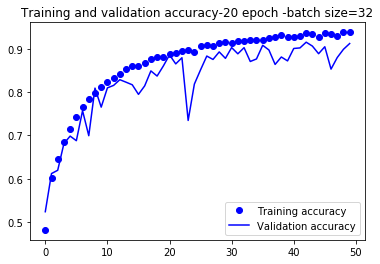

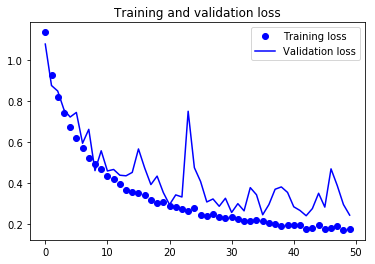

In [9]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy-20 epoch -batch size=32')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()